<h1><center> Using Machine Learning Techniques in <br> the Detection of Fake News </center></h1>

<h2 style='font-weight:normal'><center> Spring Term Project, <b> Lisanna Lehes </b> </center></h2>

<div style="text-align: right"> 
Universidad de Huelva <br>
Facultad de CC. Experimentales <br>
Grado en Química <br>
Computational Chemistry
 </div>


#### <b>Aim of the project:</b> to create a machine learning model that would help detect fake news using Scikit-learn library and Passive Agression Algorithm.

## Part I

### 1. Importing the necessary libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from tkinter import *

### 2. Importing the dataset

In [2]:
# Importing dataset
df = pd.read_csv('/Users/Lisanna/Desktop/fake_news/train.csv')

In [3]:
df.shape

(20800, 5)

In [4]:
# Returning the first 5 rows
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### 3. Converting the '0's and '1's to 'FAKE' and 'TRUE'

‘0’ for RELIABLE article <br>
‘1’ for FAKE NEWS

In [5]:
# Accessing a group of rows and columns by label
df.loc[(df['label'] == 1) , ['label']] = 'FAKE'
df.loc[(df['label'] == 0), ['label']] = 'REAL'

In [6]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,FAKE
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,REAL
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",FAKE
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,FAKE
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,FAKE


### 4. Splitting the dataset into test and training data

In [7]:
labels = df.label
labels.head()

0    FAKE
1    REAL
2    FAKE
3    FAKE
4    FAKE
Name: label, dtype: object

In [8]:
labels.value_counts()

FAKE    10413
REAL    10387
Name: label, dtype: int64

Splitting the downloaded dataset into two subsets, 70% of the entries
will be used to train the model and the rest (30%) to test the model’s predictive power.

In [9]:
from sklearn.model_selection import train_test_split
# Split arrays or matrices into random train and test subsets

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df['text'].values.astype('str'), labels, test_size = 0.3, random_state = 7)

In [11]:
# Random_state parameter may be provided to control the random number generator used

### 5. Using TfidfVectorizer

__TfidfVectorizer__ uses stop words from the English language. <br>
The number of times a word appears in a document is its __Term Frequency__. <br> A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

__max_df__ --> ignores terms that appear in more than 70% of the documents --> used for terms that appear too frequently

### 6. Fitting and transfroming the test and training data set

In [14]:
tfidf_train = tfidf_vectorizer.fit_transform(x_train)

In [15]:
tfidf_test = tfidf_vectorizer.transform(x_test)

* __transform()__ : parameters generated from fit() method,applied upon model to generate transformed data set.

* __fit_transform()__ : combination of fit() and transform() api on same data set



### 7. Initializing PassiveAggressiveClassifier

In [16]:
from sklearn.linear_model import PassiveAggressiveClassifier
# Passive: if correct classification, keep the model; 
# Aggressive: if incorrect classification, update to adjust to this misclassified example.

In [17]:
pa_classifier = PassiveAggressiveClassifier(max_iter = 50)
pa_classifier.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

__max_iter__ --> Maximum number of iterations of the k-means algorithm for a single run.


### 8. Predicting and calculating the accuracy

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
y_pred = pa_classifier.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)

In [20]:
print('Accuracy:', score)

Accuracy: 0.9629807692307693


In [21]:
print(f'Accuracy: {round(score*100, 3)}%')

Accuracy: 96.298%


Now the accuracy of the model can be seen when it was conducting its tests. <br> Whereas we know the model's accuracy, we don't know the number of successful predictions/failures. <br> Therefore, we are now going to build a confusion matrix.

### 9. Building a confusion matrix

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import itertools


In [65]:
cm = confusion_matrix(y_test, y_pred, labels = ['FAKE', 'REAL'])

To plot the confusion matrix, I got the inspiration from here: https://www.kaggle.com/grfiv4/plot-a-confusion-matrix

In [69]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

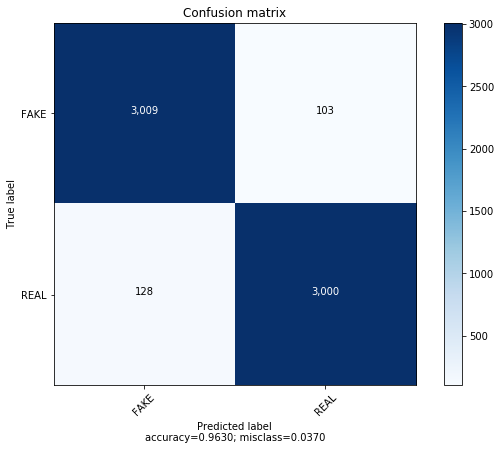

In [70]:

plot_confusion_matrix(cm, target_names=['FAKE','REAL'])


__Results:__ <br>
* The model successfully predicted 3009 positives. (Is fake and is predicted as fake)
* The model successfully predicted 3000 negatives. (Is real and is predicted as real)
* The model predicted 128 false positives. (Real news were considered as fake)
* The model predicted 103 false negatives. (Fake News were considered as real)

Additionally, we could compute the __F1-score__. <br> 
__F1 score__ is used to measure a test’s accuracy, therefore, an F-score is considered perfect when it's 1 , while the model is a total failure when it's 0.<br>  A good __F1-score__ means that you have low false positives and low false negatives,


F1 = 2TP / (2TP + FP + FN)

In [71]:
F1 = 2*3009 / (2*3000 + 128 + 103)
print(F1)

0.9658160808858931


In [72]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, labels = ['FAKE', 'REAL']))

              precision    recall  f1-score   support

        FAKE       0.96      0.97      0.96      3112
        REAL       0.97      0.96      0.96      3128

    accuracy                           0.96      6240
   macro avg       0.96      0.96      0.96      6240
weighted avg       0.96      0.96      0.96      6240



## Part II

__The aim of part II is to experiment on the model by adding and substracting some variables and to see if the accuracy score is affected by it e.g.:__

1. Build a model that would take in __only__ the title of a news article and then predict if it's fake or real.

### 1. Experimenting with the title of news articles

In [29]:
labels_2 = df.label

In [30]:
x_train_title, x_test_title ,y_train_title ,y_test_title = train_test_split(df['title'].values.astype('str'), labels_2, test_size=0.3, random_state=7)


In [32]:
tfidf_vectorizer_title = TfidfVectorizer(stop_words='english', max_df=0.7)
#Fit and transform train set, transform test set

tfidf_train_title = tfidf_vectorizer_title.fit_transform(x_train_title) 
tfidf_test_title = tfidf_vectorizer_title.transform(x_test_title)

In [33]:
pa_classifier_title = PassiveAggressiveClassifier(max_iter = 50)
pa_classifier_title.fit(tfidf_train_title, y_train_title)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [34]:
y_pred_title = pa_classifier_title.predict(tfidf_test_title)
score_title = accuracy_score(y_test_title, y_pred_title)
print('Accuracy:', score_title)

Accuracy: 0.9285256410256411


In [35]:
print(f'Accuracy: {round(score_title*100, 3)}%')

Accuracy: 92.853%


In [73]:
cm_2 = confusion_matrix(y_test_title, y_pred_title, labels = ['FAKE', 'REAL'])

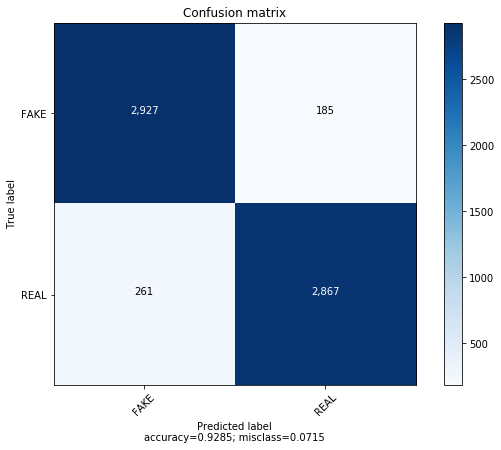

In [76]:
plot_confusion_matrix(cm_2, target_names=['FAKE','REAL'])


__Results:__
* The model predicted 2927 positives. (Is fake and were considered fake)
* The model predicted 2867 negatives. (Is real and were considered real)
* The model predicted 261 false positives. (Real news wereconsidered as fake)
* The model predicted 154 false negatives. (Fake news were considered as real)
<br>


In [75]:
print(metrics.classification_report(y_test_title, y_pred_title, labels = ['FAKE', 'REAL']))

              precision    recall  f1-score   support

        FAKE       0.92      0.94      0.93      3112
        REAL       0.94      0.92      0.93      3128

    accuracy                           0.93      6240
   macro avg       0.93      0.93      0.93      6240
weighted avg       0.93      0.93      0.93      6240



## Part III

__The aim of the third part is to try to implement a GUI and test the original model with other news articles (not from the Kaggle dataset)__

In [38]:
from tkinter import *

In [ ]:
def analyze_article(text):
    print(text)
    vector = tfidf_vectorizer.transform([text])
    print(vector)
    result = pa_classifier.predict(vector)
    result1 = pa_classifier.decision_function(vector)
    print(result)
    print(result1)

In [ ]:
root = Tk()
#Label 1
label1 = Label(root,text = 'Article:')
label1.pack()
label1.config(justify = CENTER)

entry1 = Text(root, width = 60, height = 10)
entry1.pack()

button1 = Button(root, text = 'Analyze')
button1.pack() 
button1.config(command = lambda: analyze_article(entry1.get("1.0",'end-1c')))

root.mainloop()